Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')
14082.8
3553.889071909316
1841.865105740182


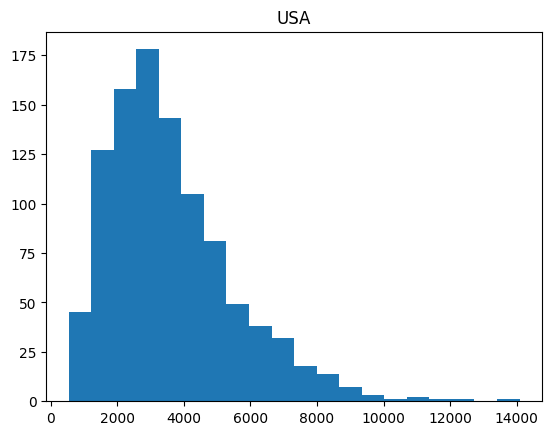

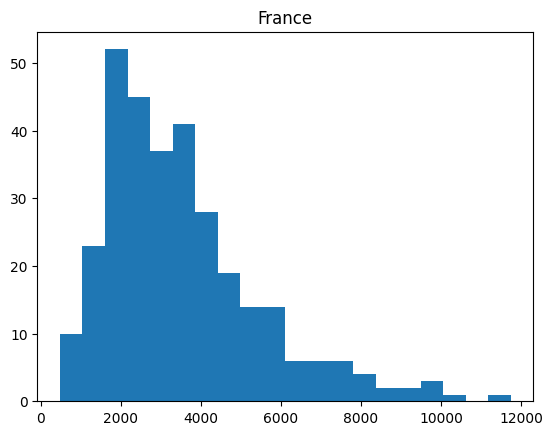

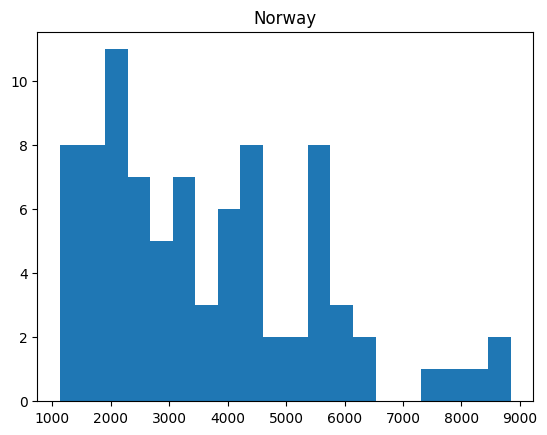

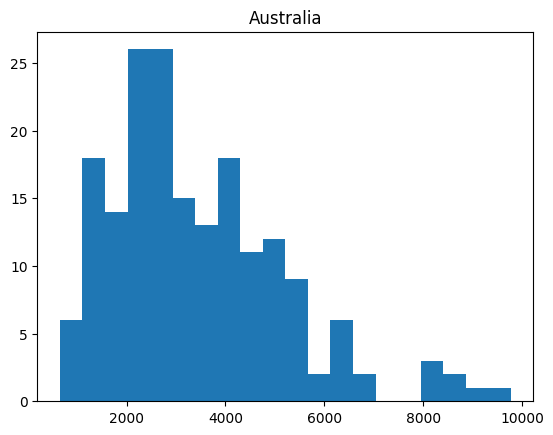

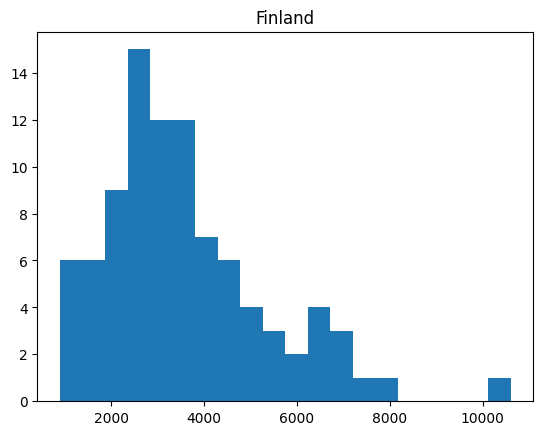

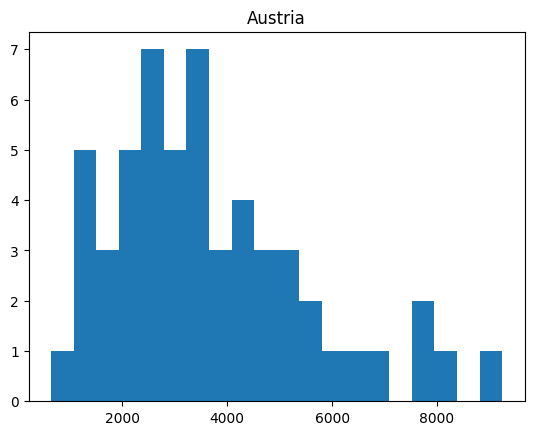

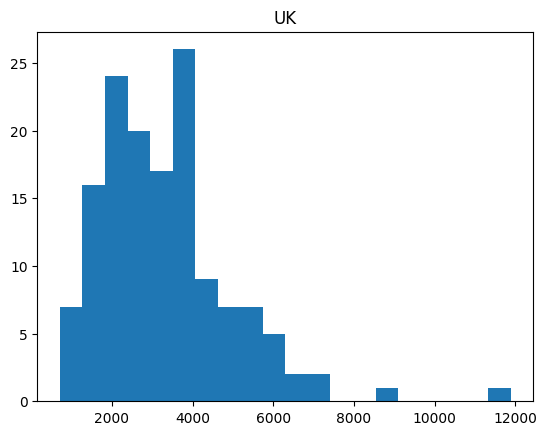

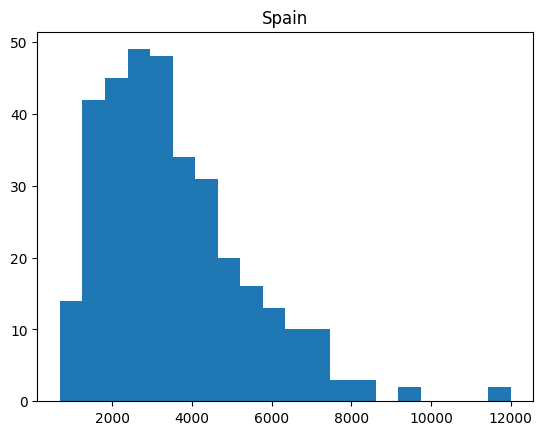

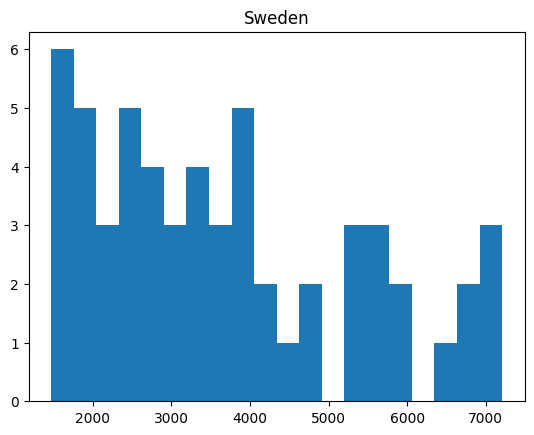

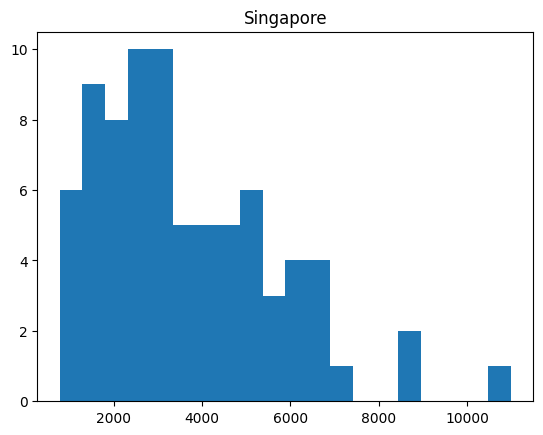

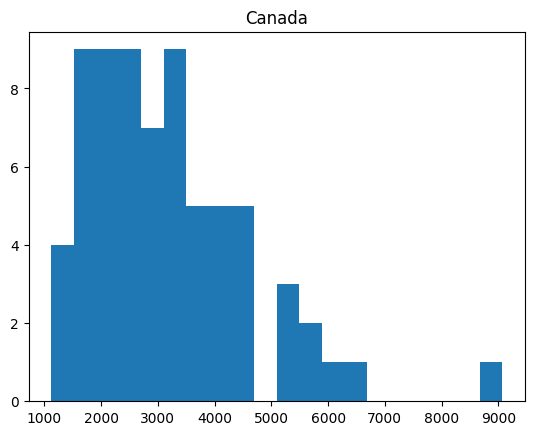

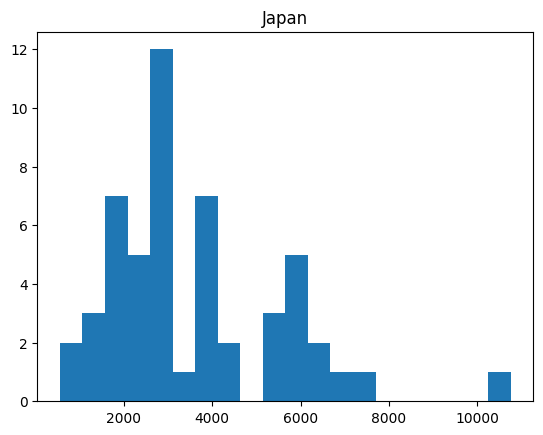

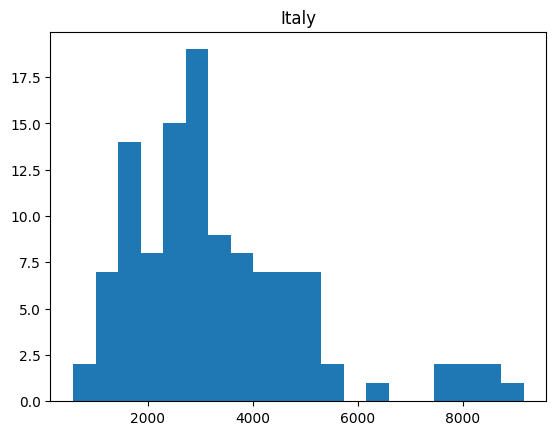

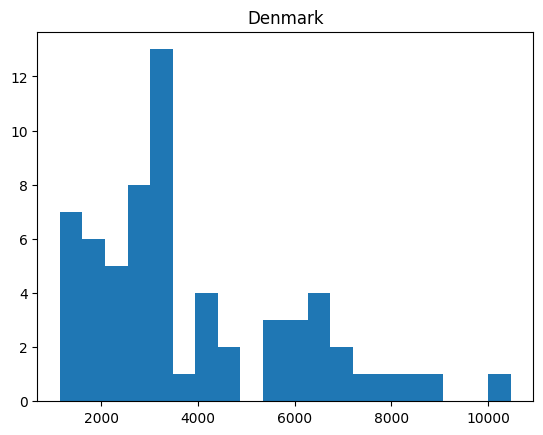

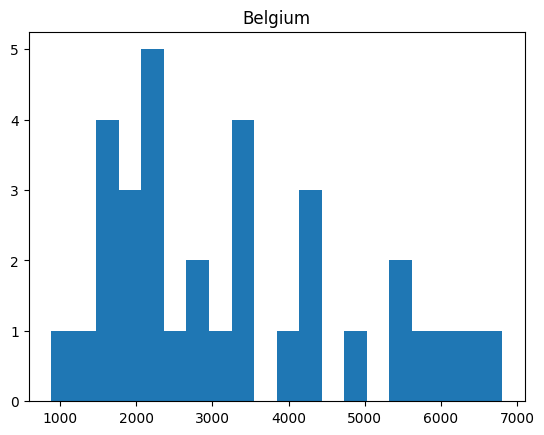

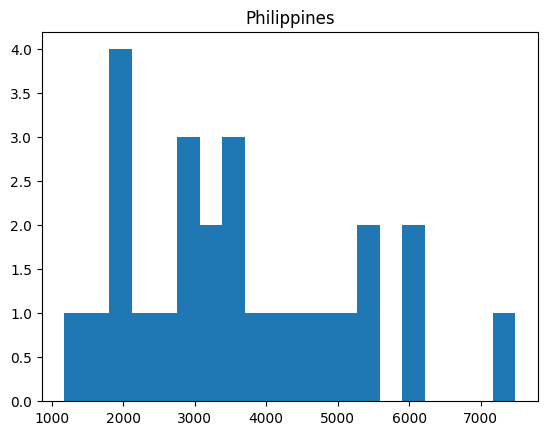

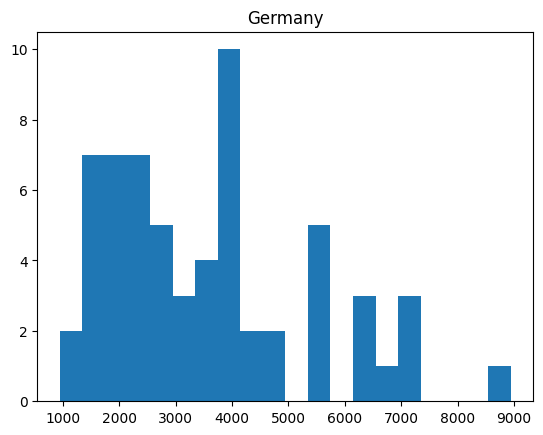

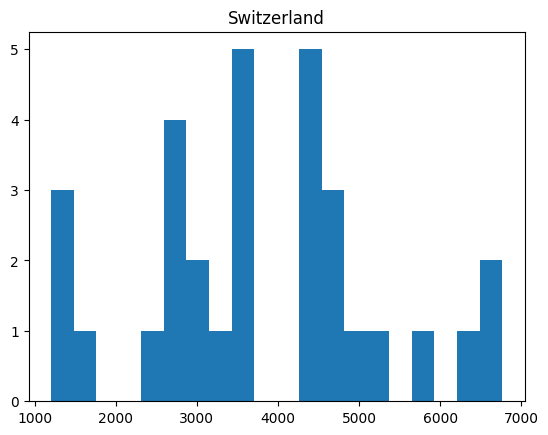

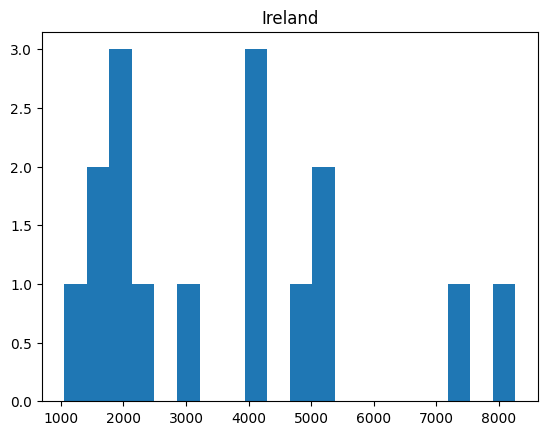

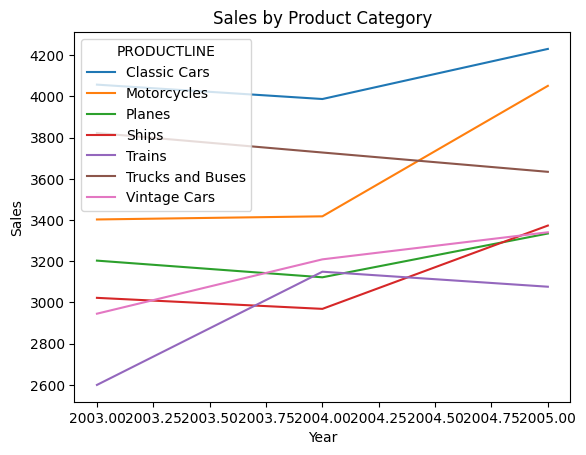

CITY
Aaarhus            7975.44
Allentown          7020.64
Bergen             8272.34
Boras              7136.19
Boston             7060.24
Brickhaven         9240.44
Bridgewater        8236.75
Brisbane           8448.64
Burlingame         7374.10
Cambridge          7455.87
Chatswood          7956.46
Dublin             7181.44
Espoo             10606.20
Frankfurt          7016.31
Glen Waverly       8427.02
Helsinki           7264.53
Kobenhavn          7169.28
Koln               8940.96
Lille              8892.90
Liverpool          7310.00
Lule               7209.11
Lyon               7017.76
Madrid             7036.89
Makati City        7483.98
Manchester         7310.00
Marseille          7599.90
Melbourne          9264.86
Minato-ku          7031.52
NYC                7023.90
Nantes            10039.60
Nashua             7421.30
New Bedford        7154.50
New Haven          7232.16
Newark             7078.23
North Sydney       8344.71
Oslo               7488.04
Oulu               7083

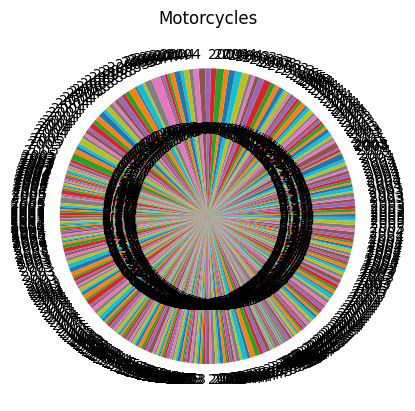

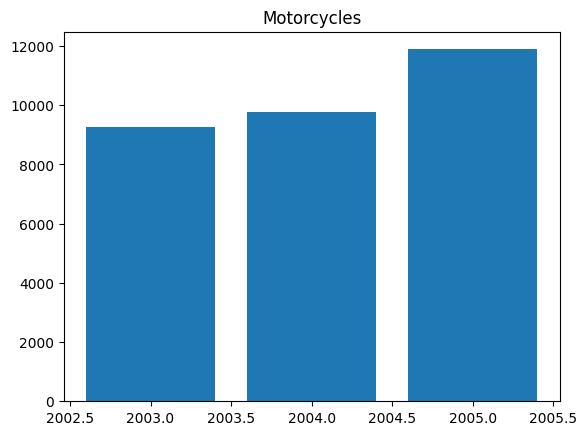

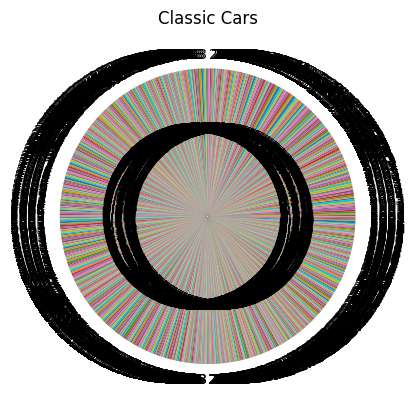

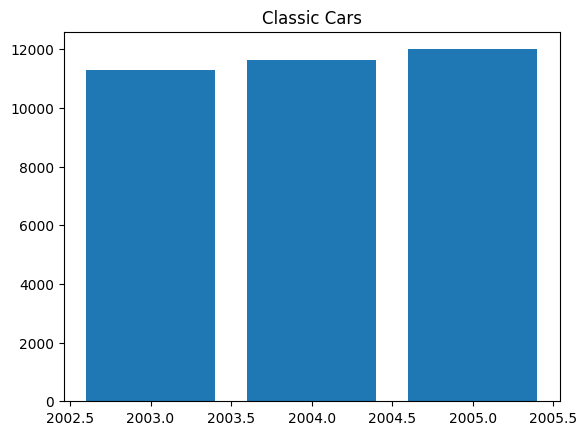

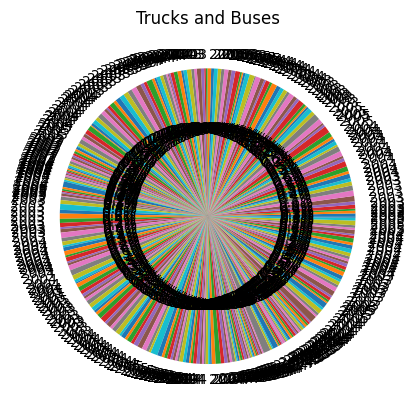

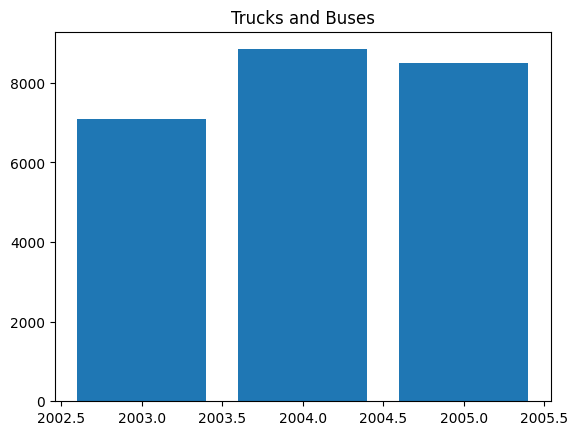

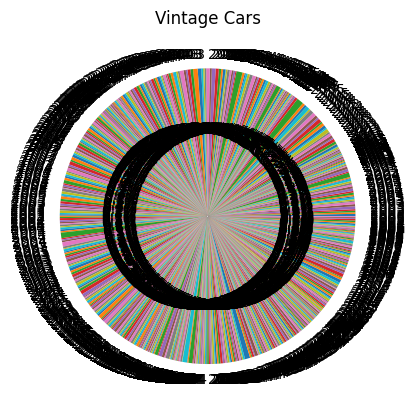

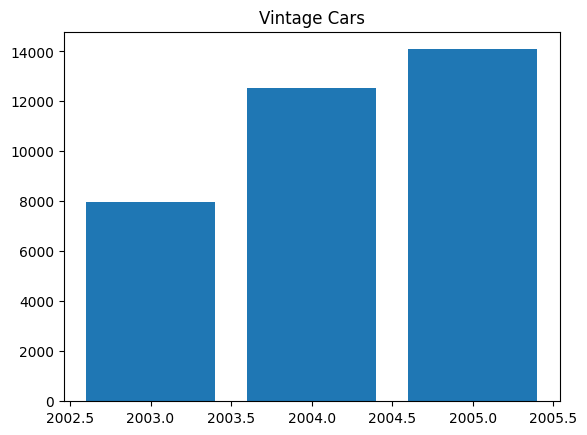

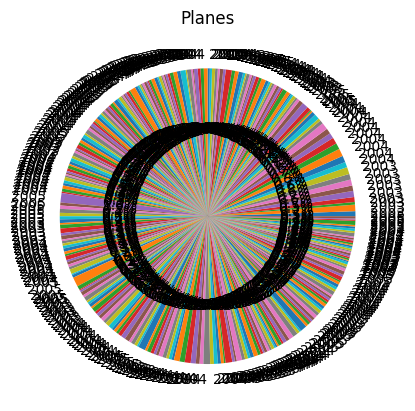

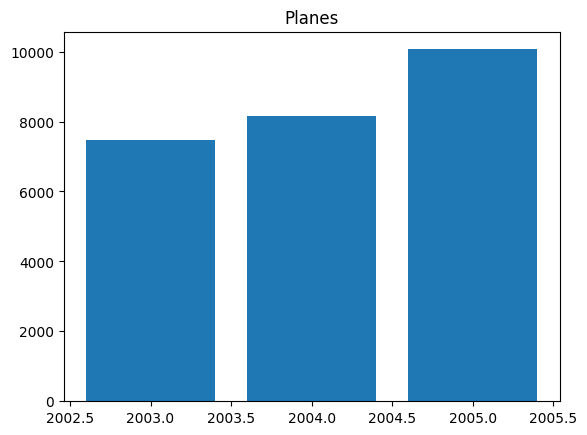

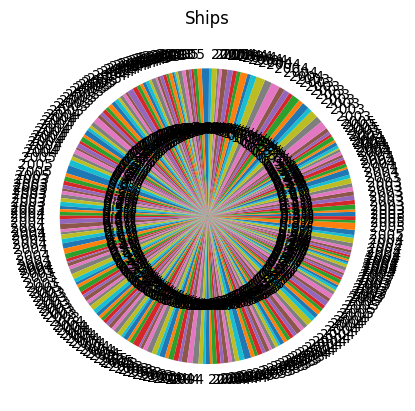

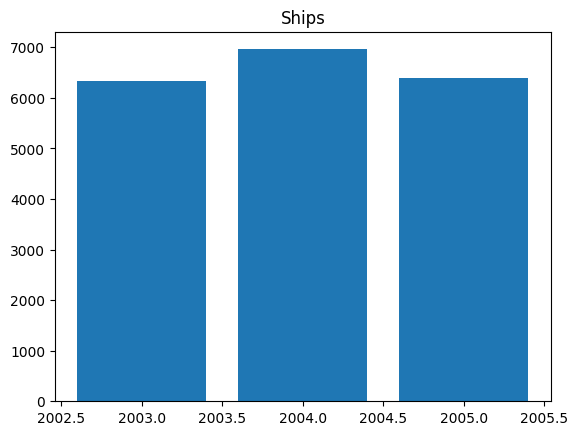

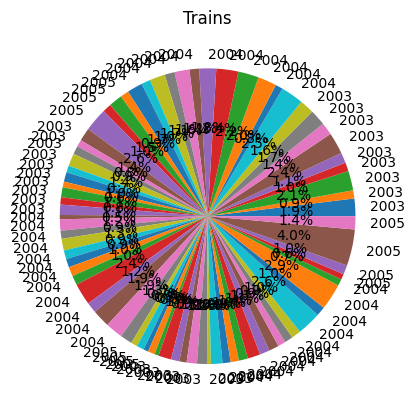

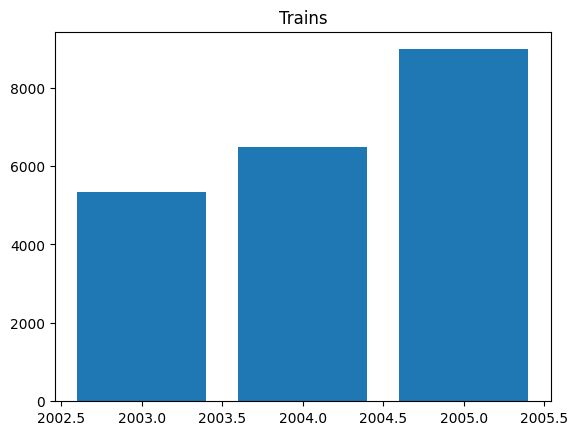

PRODUCTLINE
Classic Cars        12001.00
Motorcycles         11886.60
Planes              10066.60
Ships                6960.48
Trains               8977.05
Trucks and Buses     8844.12
Vintage Cars        14082.80
Name: SALES, dtype: float64
PRODUCTLINE
Classic Cars         640.05
Motorcycles          651.80
Planes               875.91
Ships               1089.36
Trains               972.40
Trucks and Buses     482.13
Vintage Cars         541.14
Name: SALES, dtype: float64


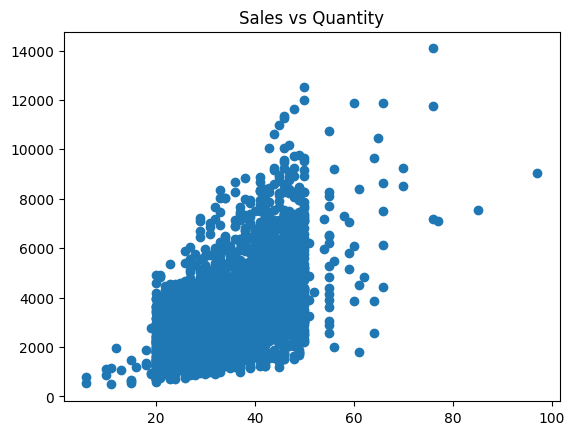

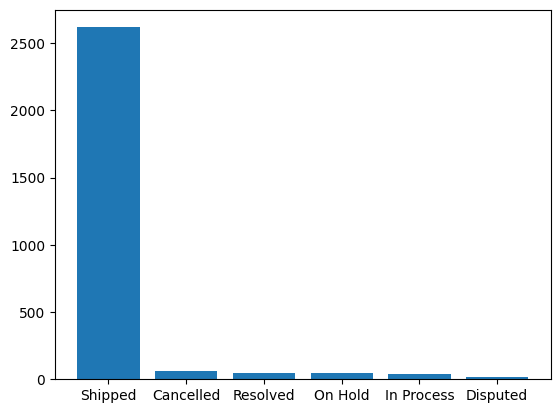

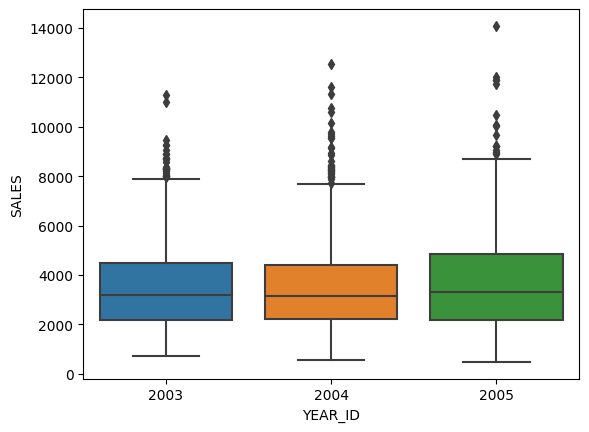

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('/content/sales_data_sample.csv', encoding='ISO-8859-1')

# 1. Data understanding
print(data.columns)
print(data['SALES'].max())
print(data['SALES'].mean())
print(data['SALES'].std())

# Data has sale price, product, quantity, dealsize, status etc.
# Max sale price is 120000
# Mean sale price is 45000-50000
# Standard deviation around 30000

# 2. Sales by country
countries = data['COUNTRY'].unique()

for country in countries:
    country_data = data[data['COUNTRY'] == country]
    plt.hist(country_data['SALES'], bins=20)
    plt.title(country)
    plt.show()


# 3. Multiline plot

categories = ['Motorcycles', 'Classic Cars', 'Vintage Cars', 'Trucks and Buses', 'Planes', 'Ships', 'Trains']
df = data[data['PRODUCTLINE'].isin(categories)]

# Pivot data to get sales values grouped by year and product category
table = pd.pivot_table(df, index='YEAR_ID', columns='PRODUCTLINE', values='SALES')

# Plot multiline chart
ax = table.plot(kind='line')
ax.set_xlabel('Year')
ax.set_ylabel('Sales')
ax.set_title('Sales by Product Category')

plt.show()

# 4. Minimum dealsize for Large
df_large = data[data['DEALSIZE'] == 'Large']

# Get minimum sale price for Large dealsize by city
min_large_by_city = df_large.groupby('CITY')['SALES'].min()
print(min_large_by_city)
# 5. Most common dealsize
print(data['DEALSIZE'].mode()[0])
# 6. Average quantity
print(data['QUANTITYORDERED'].mean())

# 7. Sales by product line
product_lines = data['PRODUCTLINE'].unique()

for line in product_lines:
    subset = data[data['PRODUCTLINE'] == line]

    plt.pie(subset['SALES'], labels=subset['YEAR_ID'], autopct='%0.1f%%')
    plt.title(line)
    plt.show()

    plt.bar(subset['YEAR_ID'], subset['SALES'])
    plt.title(line)
    plt.show()

# 8. Min and max sales by product line
print(data.groupby('PRODUCTLINE')['SALES'].max())
print(data.groupby('PRODUCTLINE')['SALES'].min())

# 9. Scatter plot
plt.scatter(data['QUANTITYORDERED'], data['SALES'])
plt.title('Sales vs Quantity')
plt.show()

# Higher quantity mostly leads to higher sales

# 10. Status bar chart
status_count = data['STATUS'].value_counts()
plt.bar(status_count.index, status_count.values)
plt.show()

# 11. Boxplot
sns.boxplot(x='YEAR_ID', y='SALES', data=data)
plt.show()

# Sales concentrated around 30000-80000 for all years